<a href="https://colab.research.google.com/github/ansem7/cs199specialproject/blob/main/TorchAttacksTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Install torchattacks**

In [ ]:
# !pip install torchattacks
! wget -O apple.jpg https://images.everydayhealth.com/images/diet-nutrition/apples-101-about-1440x810.jpg # Replace this(the second) url for another image. (It's currently an apple)
! wget -O imagenet_class_index.json https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json

--2024-06-05 22:29:39--  https://images.everydayhealth.com/images/diet-nutrition/apples-101-about-1440x810.jpg
Resolving images.everydayhealth.com (images.everydayhealth.com)... 23.212.251.149, 23.212.251.143
Connecting to images.everydayhealth.com (images.everydayhealth.com)|23.212.251.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202291 (198K) [image/jpeg]
Saving to: ‘apple.jpg’

apple.jpg           100%[===================>] 197.55K  --.-KB/s    in 0.08s   

2024-06-05 22:29:39 (2.31 MB/s) - ‘apple.jpg’ saved [202291/202291]

--2024-06-05 22:29:39--  https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [text/plain]
Saving 

**2. Import the necessary libraries:**

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torchattacks import FGSM
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

**3. Load the pretrained ResNet50 model:**

In [ ]:
model = resnet50(pretrained=True).eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


**4. Define the transformation for your image:**

In [ ]:
transform = transforms.Compose([
    transforms.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),  # Convert image to RGB if it's not
    #transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

**5. Load your image**

In [ ]:
image = Image.open('apple.jpg')
image = transform(image).unsqueeze(0)

**6. Create an instance of the FGSM attack**

In [ ]:
# attack = FGSM(model, eps=0.2)

from torchattacks import NIFGSM
attack = NIFGSM(model, eps=0.2)

**7. Apply the attack to your image:**

In [ ]:
adv_image = attack(image, torch.tensor([322]))  # 948 is the ImageNet class index for 'apple'

**8. Generate image**

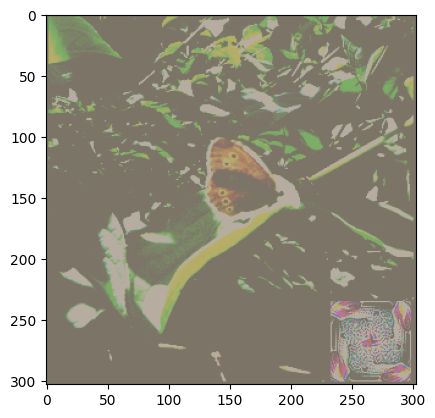

In [ ]:
# Convert the adversarial image back to the [0, 1] range
adv_image = adv_image.squeeze().detach().cpu().numpy().transpose(1, 2, 0)
adv_image = (adv_image * torch.tensor([0.229, 0.224, 0.225]).numpy()) + torch.tensor([0.485, 0.456, 0.406]).numpy()
adv_image = np.clip(adv_image, 0, 1)

# Display the adversarial image
plt.imshow(adv_image)
plt.show()

**9. After generating the adversarial image and converting it back to the [0, 1] range, you can add the following code to save it:**

In [ ]:
# Convert the adversarial image back to the [0, 255] range and to uint8 type
adv_image = (adv_image * 255).astype(np.uint8)

# Convert the numpy array back to a PIL image
adv_image_pil = Image.fromarray(adv_image)

# Save the image (replace 'path_to_save_image.jpg' with the actual path where you want to save the image)
adv_image_pil.save('/content/banana.jpg')

**10. Import Required Libraries:**

In [ ]:
import torch
from torchvision import models, transforms

**11. Load Pre-Trained Model:**

In [ ]:
model = models.resnet50(pretrained=True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**12. Preprocess the Image:**

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

**13. Load and Preprocess Your Image:**

In [ ]:
from PIL import Image

img = Image.open("banana.jpg").convert("RGB")
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

**14. Download the ImageNet Class Index File:** You can download the ImageNet class index file (a JSON file that maps class indices to labels) from this link. Save it in your working directory.

**15. Load the Class Index File:** You can load the class index file using the json module in Python. The loaded object is a dictionary that maps indices to class labels.

In [ ]:
import json

# Upload the json file to google colab first before running this.
with open("imagenet_class_index.json") as f:
    class_idx = json.load(f)

idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In this code, idx2label is a list of class labels in the correct order.

**16. Get the class name of the predicted class:**

In [ ]:
with torch.no_grad():
    output = model(batch_t)
_, predicted_idx = torch.max(output, 1)

# Get the name of the predicted class
predicted_class = idx2label[predicted_idx.item()]

print(f"The model predicts that the image belongs to: {predicted_class}.")

The model predicts that the image belongs to: tray.
